# User Churn Model
<br>

### Project Purpose
The project aims to gain an in-depth understanding of user profiles and behavioral preferences, identify key factors influencing user churn, and utilize algorithms to predict customer visit conversions. This will help in enhancing product design and improving user experience.
<br>

### Data Description
The data used in this project represents one week of visit data from Ctrip users. To protect customer privacy, the data has been anonymized, and there may be some discrepancies with actual order quantities, page views, and conversion rates. However, this does not affect the solvability of the problem.
<br>

### Case Description
The case involves a classification information application that uses data mining to analyze key factors affecting user churn and understand user behavioral preferences. Based on the analysis, adjustments are made to improve customer retention and enhance customer loyalty. Additionally, the project uses the Random Forest algorithm to predict customer churn.
<br>

### Project Content
Explore data distribution and missing values, and perform targeted imputation for missing data. For features with few missing values, use the Random Forest imputation method. Deal with outliers using methods such as 3-sigma rule and boxplots. Encode categorical variables.

Apply variance filtering and F-test to remove some features. Perform Weight of Evidence (WOE) binning for the remaining features. Visualize the binning results for each feature to analyze user behavioral preferences. Further filter features based on the Information Value (IV) of each feature.

Train the Random Forest model, tune and evaluate its performance, and output the final model. Use this model to predict user churn and take actions to retain users. Train the Logistic Regression model for its strong interpretability (feature coefficients) to explain the key factors of user churn. Also try to apply XGBoost in comparison of random forest.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#adjust the font
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

# data check and cleaning

## read the data

In [3]:
data = pd.read_table('userlostprob.txt')
data.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


## explore the data

In [4]:
data.shape

(689945, 51)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   label                             689945 non-null  int64  
 1   sampleid                          689945 non-null  int64  
 2   d                                 689945 non-null  object 
 3   arrival                           689945 non-null  object 
 4   iforderpv_24h                     689945 non-null  int64  
 5   decisionhabit_user                385450 non-null  float64
 6   historyvisit_7ordernum            82915 non-null   float64
 7   historyvisit_totalordernum        386525 non-null  float64
 8   hotelcr                           689148 non-null  float64
 9   ordercanceledprecent              447831 non-null  float64
 10  landhalfhours                     661312 non-null  float64
 11  ordercanncelednum                 447831 non-null  f

In [6]:
data.dtypes

label                                 int64
sampleid                              int64
d                                    object
arrival                              object
iforderpv_24h                         int64
decisionhabit_user                  float64
historyvisit_7ordernum              float64
historyvisit_totalordernum          float64
hotelcr                             float64
ordercanceledprecent                float64
landhalfhours                       float64
ordercanncelednum                   float64
commentnums                         float64
starprefer                          float64
novoters                            float64
consuming_capacity                  float64
historyvisit_avghotelnum            float64
cancelrate                          float64
historyvisit_visit_detailpagenum    float64
delta_price1                        float64
price_sensitive                     float64
hoteluv                             float64
businessrate_pre                

almost all the columns are float64

### sample check

In [7]:
data.sample(5)

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
471990,0,811735,2016-05-19,2016-05-19,0,1.0,NaN,4.0,1.00,1.00,...,109.0,38808.0,0.28,6.753,1.600,7333.0,1.20,36,2959.0,9
497057,0,853696,2016-05-18,2016-05-18,1,1.0,NaN,3.0,1.05,1.00,...,489.0,344736.0,0.07,0.247,NaN,88.0,1.00,488,769.0,16
359694,0,624197,2016-05-18,2016-06-07,0,6.0,1.0,53.0,1.06,0.20,...,860.0,80845.0,0.61,1.660,0.167,2853.0,1.00,102,6080.0,10
654461,0,1115399,2016-05-17,2016-05-18,0,5.0,NaN,38.0,1.09,0.62,...,308.0,33905.0,0.56,0.467,0.080,33266.0,1.08,552,1776.0,22
188482,1,339090,2016-05-15,2016-05-15,0,NaN,NaN,1.0,1.04,1.00,...,194.0,367847.0,0.61,11.440,2.213,44750.0,NaN,176,119.0,15


## brief description

In [8]:
data.describe()

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
count,689945.000000,6.899450e+05,689945.000000,385450.000000,82915.000000,386525.000000,689148.000000,447831.000000,661312.000000,447831.000000,...,660664.000000,447831.000000,602960.000000,682274.000000,651263.000000,592818.000000,457896.000000,689945.000000,5.929100e+05,689945.000000
mean,0.274452,6.285402e+05,0.193737,5.317048,1.856094,11.710487,1.060996,0.342119,6.086366,154.179369,...,318.541812,101830.919400,0.368237,10.648278,2.253250,12049.409382,1.137476,153.702414,1.855185e+04,14.462315
std,0.446238,4.146815e+05,0.395226,38.524483,2.103862,17.251429,0.045264,0.354210,12.413225,398.456986,...,351.913035,122784.313864,0.219945,15.696682,3.538453,25601.374138,0.204789,277.807697,2.288603e+05,6.301575
min,0.000000,2.463600e+04,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.007000,0.007000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,0.000000,3.123200e+05,0.000000,2.000000,1.000000,2.000000,1.030000,0.000000,0.000000,0.000000,...,145.000000,14999.000000,0.170000,0.827000,0.127000,551.000000,1.000000,17.000000,4.710000e+02,11.000000
50%,0.000000,5.996370e+05,0.000000,3.000000,1.000000,6.000000,1.050000,0.250000,0.000000,2.000000,...,233.000000,46890.000000,0.400000,3.527000,0.627000,2848.000000,1.050000,62.000000,1.315000e+03,15.000000
75%,1.000000,8.874600e+05,0.000000,5.000000,2.000000,14.000000,1.090000,0.570000,4.000000,153.000000,...,388.000000,138953.000000,0.550000,13.327000,2.747000,10726.000000,1.210000,180.000000,3.141000e+03,20.000000
max,1.000000,2.238426e+06,1.000000,3167.000000,106.000000,711.000000,3.180000,1.000000,49.000000,13475.000000,...,43700.000000,527026.000000,0.990000,67.140000,14.507000,194386.000000,11.000000,9956.000000,9.651192e+06,23.000000


In [9]:
valid_columns = data.select_dtypes(include='number').columns
data[valid_columns].mean(axis=0)

label                                    0.274452
sampleid                            628540.209625
iforderpv_24h                            0.193737
decisionhabit_user                       5.317048
historyvisit_7ordernum                   1.856094
historyvisit_totalordernum              11.710487
hotelcr                                  1.060996
ordercanceledprecent                     0.342119
landhalfhours                            6.086366
ordercanncelednum                      154.179369
commentnums                           1272.090888
starprefer                              67.532304
novoters                              1706.247901
consuming_capacity                      39.154140
historyvisit_avghotelnum                 6.510179
cancelrate                            1051.604143
historyvisit_visit_detailpagenum        37.153603
delta_price1                            79.067012
price_sensitive                         24.645863
hoteluv                                 95.092708


## duplicates 

In [10]:
print(data.shape)

data.drop_duplicates(inplace=True)
print(data.shape)

(689945, 51)
(689945, 51)


## NA values

In [11]:
null_ = data.isna().mean().reset_index().sort_values(by=0, ascending=False)

null_1 = null_.rename(columns={'index':'Feature',0:'NA ratio'}).reset_index(drop=True)

In [12]:
null_1.head()

,Feature,NA ratio
0,historyvisit_7ordernum,0.879824
1,historyvisit_visit_detailpagenum,0.554698
2,firstorder_bu,0.453590
3,decisionhabit_user,0.441332
4,historyvisit_totalordernum,0.439774


<AxesSubplot:xlabel='NA ratio', ylabel='Density'>

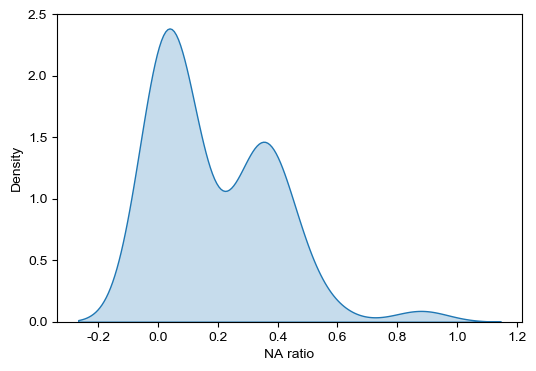

In [13]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.kdeplot(null_1['NA ratio'],shade=True)

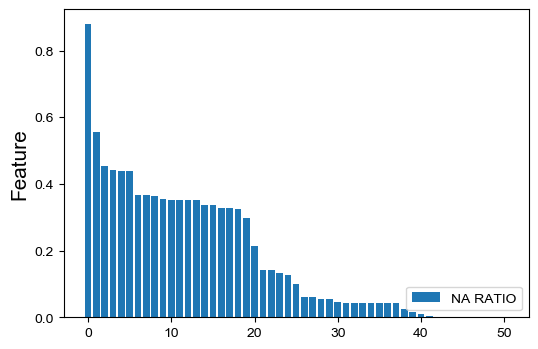

In [14]:
plt.figure(figsize=(6,4))
plt.bar(range(null_1.shape[0]),null_1['NA ratio'],label='NA RATIO')
plt.legend(loc=4)
plt.ylabel('Feature',fontsize=15);

reset the index

In [15]:
null_2 = null_.set_index('index')
null_2['NA ratio'] = null_2[0].map(lambda x : round(x,2))
null_2.drop(0, axis=1).head(8)

,NA ratio
index,
historyvisit_7ordernum,0.88
historyvisit_visit_detailpagenum,0.55
firstorder_bu,0.45
decisionhabit_user,0.44
historyvisit_totalordernum,0.44
historyvisit_avghotelnum,0.44
delta_price1,0.37
delta_price2,0.37


visualize the null value

<AxesSubplot:>

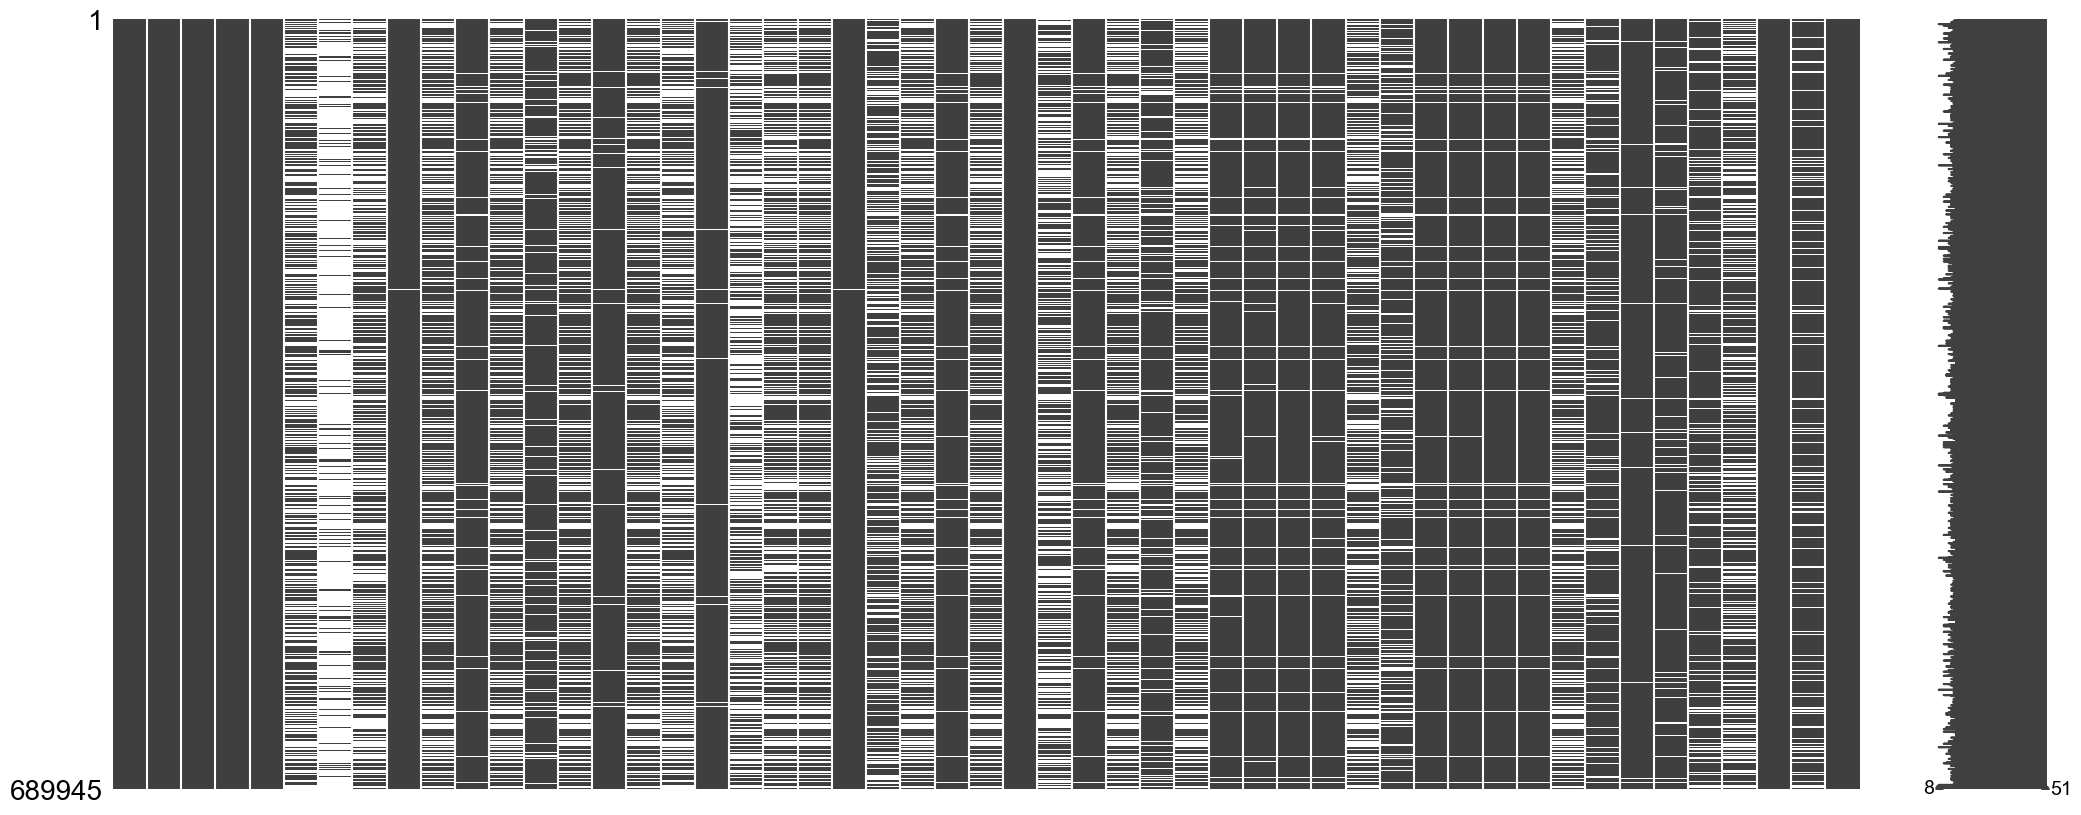

In [16]:
import missingno as msno
msno.matrix(data)

delete column with high NA ratio

In [17]:
name = null_1[null_1['NA ratio'] > 0.5].Feature.tolist()

data = data.drop(columns = name)

data.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,1.04,NaN,22.0,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,1.06,NaN,0.0,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,1.05,NaN,3.0,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,1.01,NaN,2.0,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,1.00,NaN,0.0,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


In [18]:
name

['historyvisit_7ordernum', 'historyvisit_visit_detailpagenum']

## Outliers

In [19]:
data.describe([0.01,0.25,0.5,0.75,0.99],include='all')

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
count,689945.000000,6.899450e+05,689945,689945,689945.000000,385450.000000,386525.000000,689148.000000,447831.000000,661312.000000,...,660664.000000,447831.000000,602960.000000,682274.000000,651263.000000,592818.000000,457896.000000,689945.000000,5.929100e+05,689945.000000
unique,NaN,NaN,7,37,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2016-05-20,2016-05-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,111985,110982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.274452,6.285402e+05,NaN,NaN,0.193737,5.317048,11.710487,1.060996,0.342119,6.086366,...,318.541812,101830.919400,0.368237,10.648278,2.253250,12049.409382,1.137476,153.702414,1.855185e+04,14.462315
std,0.446238,4.146815e+05,NaN,NaN,0.395226,38.524483,17.251429,0.045264,0.354210,12.413225,...,351.913035,122784.313864,0.219945,15.696682,3.538453,25601.374138,0.204789,277.807697,2.288603e+05,6.301575
min,0.000000,2.463600e+04,NaN,NaN,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.007000,0.007000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
1%,0.000000,3.620588e+04,NaN,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,52.000000,244.000000,0.010000,0.013000,0.007000,0.000000,1.000000,1.000000,2.100000e+01,0.000000
25%,0.000000,3.123200e+05,NaN,NaN,0.000000,2.000000,2.000000,1.030000,0.000000,0.000000,...,145.000000,14999.000000,0.170000,0.827000,0.127000,551.000000,1.000000,17.000000,4.710000e+02,11.000000
50%,0.000000,5.996370e+05,NaN,NaN,0.000000,3.000000,6.000000,1.050000,0.250000,0.000000,...,233.000000,46890.000000,0.400000,3.527000,0.627000,2848.000000,1.050000,62.000000,1.315000e+03,15.000000


use capping to handle outliers

In [20]:
data.loc[:,['lowestprice','lowestprice_pre']].describe([0.01,0.25,0.5,0.75,0.99],include='all').T

,count,mean,std,min,1%,25%,50%,75%,99%,max
lowestprice,687931.0,318.806242,575.782415,-3.0,37.0,116.0,200.0,380.0,1823.0,100000.0
lowestprice_pre,659689.0,315.954583,463.723643,1.0,38.0,118.0,208.0,385.0,1750.0,100000.0


these columns contain outliers

In [21]:
col_01 = ['lowestprice','lowestprice_pre'] 

In [22]:
def block_lower(x):
# x是输⼊入的Series对象,替换1%分位数
    ql = x.quantile(.01)
    out = x.mask(x<ql,ql)
    return(out)

In [23]:
def block_upper(x):
# x是输⼊入的Series对象,l替换99%分位数
    qu = x.quantile(.99)
    out = x.mask(x>qu,qu)
    return(out)

In [24]:
#change the value

data.loc[:,col_01]=data.loc[:,col_01].apply(block_upper)

data.loc[:,col_01]=data.loc[:,col_01].apply(block_lower)

In [25]:
data.loc[:,['lowestprice','lowestprice_pre']].describe([0.01,0.25,0.5,0.75,0.99],include='all').T

,count,mean,std,min,1%,25%,50%,75%,99%,max
lowestprice,687931.0,305.025771,297.382838,37.0,37.0,116.0,200.0,380.0,1823.0,1823.0
lowestprice_pre,659689.0,304.439507,287.192512,38.0,38.0,118.0,208.0,385.0,1750.0,1750.0


## divide dataset

In [26]:
data_copy = data.copy() # copy it 

In [27]:
X = data_copy.iloc[:,2:]
y = data_copy.label

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=114514)

In [30]:
print(Xtrain.shape)
print(Xtest.shape)

(482961, 47)
(206984, 47)


# Feature Engineering 

date data

In [31]:
date_train = Xtrain.iloc[:,:2]
date_test = Xtest.iloc[:,:2]

In [32]:
date_test.reset_index(drop=True)

,d,arrival
0,2016-05-18,2016-05-18
1,2016-05-17,2016-05-27
2,2016-05-20,2016-05-20
3,2016-05-18,2016-05-21
4,2016-05-18,2016-05-18
...,...,...
206979,2016-05-18,2016-06-04
206980,2016-05-18,2016-05-18
206981,2016-05-16,2016-05-16
206982,2016-05-20,2016-05-20


In [33]:
#date_train
date_train.reset_index(drop=True)

,d,arrival
0,2016-05-15,2016-05-20
1,2016-05-19,2016-05-20
2,2016-05-16,2016-05-16
3,2016-05-18,2016-05-23
4,2016-05-15,2016-05-21
...,...,...
482956,2016-05-20,2016-05-21
482957,2016-05-21,2016-05-23
482958,2016-05-19,2016-05-19
482959,2016-05-15,2016-05-16


In [34]:
#save the data
# date_train.to_csv('date_train.csv')
# date_test.to_csv('date_test.csv') 

## Feature filtering

In [35]:
col_no = ['sid','iforderpv_24h','h'] #no NA values
col_clf = ['decisionhabit_user'] # Category 
col_neg = ['delta_price1','delta_price2','customer_value_profit'
           ,'ctrip_profits','deltaprice_pre2_t1'] # contain negatives 
col_std = data.columns[data.describe(include='all').T['std'] >100].to_list() # std >100
col_std.remove('delta_price1')
col_std.remove('delta_price2')
col_std.remove('sampleid')
col_std.remove('lasthtlordergap')

In [36]:
col_35 = ['firstorder_bu','decisionhabit_user','historyvisit_totalordernum'
 ,'historyvisit_avghotelnum','customer_value_profit','ctrip_profits','ordernum_oneyear'
 ,'lasthtlordergap','ordercanceledprecent','ordercanncelednum'] # NA value 35% —— 55%

In [37]:
cols = X.columns.to_list()

col_norm = list(set(cols)-set(col_clf + col_std + col_neg + col_no +col_35))

In [38]:
col_norm

['landhalfhours',
 'arrival',
 'cityuvs',
 'hotelcr',
 'cancelrate_pre',
 'businessrate_pre',
 'businessrate_pre2',
 'cr',
 'consuming_capacity',
 'price_sensitive',
 'cityorders',
 'starprefer',
 'customereval_pre2',
 'd',
 'cr_pre']

## deal with NA values

Categorical variables are imputed with the 'mode' - col_clf

Features containing negative values are imputed with the 'median' - col_neg

Continuous variables with a standard deviation > 100 are imputed with the 'median' - col_std

Missing values between 35% and 55% are imputed with a constant value '-1' as a separate category.

All other variables are imputed with the 'mean' - col_norm.

In [39]:
Xtrain.loc[:,col_clf] = Xtrain.loc[:,col_clf].fillna(Xtrain.loc[:,col_clf].mode())

Xtrain.loc[:,col_neg] = Xtrain.loc[:,col_neg].fillna(Xtrain.loc[:,col_neg].median())

Xtrain.loc[:,col_std] = Xtrain.loc[:,col_std].fillna(Xtrain.loc[:,col_std].median())

Xtrain.loc[:,col_norm] = Xtrain.loc[:,col_norm].fillna(Xtrain.loc[:,col_norm].mean())

Xtrain.loc[:,col_35] = Xtrain.loc[:,col_35].fillna(-1)

/var/folders/x2/1f2pd_zs7w9bg4xgt__x3jxr0000gn/T/ipykernel_67683/2690116725.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Xtrain.loc[:,col_norm] = Xtrain.loc[:,col_norm].fillna(Xtrain.loc[:,col_norm].mean())


In [42]:
Xtest.loc[:,col_clf] = Xtest.loc[:,col_clf].fillna(Xtest.loc[:,col_clf].mode())

In [43]:
Xtest.loc[:,col_neg] = Xtest.loc[:,col_neg].fillna(Xtest.loc[:,col_neg].median())

In [44]:
Xtest.loc[:,col_std] = Xtest.loc[:,col_std].fillna(Xtest.loc[:,col_std].median())

In [45]:
Xtest.loc[:,col_norm] = Xtest.loc[:,col_norm].fillna(Xtest.loc[:,col_norm].mean())

/var/folders/x2/1f2pd_zs7w9bg4xgt__x3jxr0000gn/T/ipykernel_67683/1507238342.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Xtest.loc[:,col_norm] = Xtest.loc[:,col_norm].fillna(Xtest.loc[:,col_norm].mean())


In [46]:
Xtest.loc[:,col_35] = Xtest.loc[:,col_35].fillna(-1)

check the result

In [47]:
Xtrain.isna().any().sum()

0

In [48]:
Xtest.isna().any().sum()

0

If needed, we can build some features, and the code is above

In [49]:

# ordernum_oneyear_train = Xtrain.loc[:,'ordernum_oneyear'].reset_index(drop=True)
# ordernum_oneyear_test = Xtest.loc[:,'ordernum_oneyear'].reset_index(drop=True)
# avgprice_train = Xtrain.loc[:,'avgprice'].reset_index(drop=True)
# avgprice_test = Xtest.loc[:,'avgprice'].reset_index(drop=True)

# M_train = ordernum_oneyear_train * avgprice_train

# M_test = ordernum_oneyear_test * avgprice_test

# M_train.to_csv('M_train.csv')
# M_test.to_csv('M_test.csv')

## feature selection

In [50]:
y.value_counts()

0    500588
1    189357
Name: label, dtype: int64

In [51]:
#check the ratio
500588/189357

2.6436202516938905

In [52]:
y.shape

(689945,)

In [53]:
X.shape

(689945, 47)

## variance filtering

In [54]:
Xtrain.columns

Index(['d', 'arrival', 'iforderpv_24h', 'decisionhabit_user',
       'historyvisit_totalordernum', 'hotelcr', 'ordercanceledprecent',
       'landhalfhours', 'ordercanncelednum', 'commentnums', 'starprefer',
       'novoters', 'consuming_capacity', 'historyvisit_avghotelnum',
       'cancelrate', 'delta_price1', 'price_sensitive', 'hoteluv',
       'businessrate_pre', 'ordernum_oneyear', 'cr_pre', 'avgprice',
       'lowestprice', 'firstorder_bu', 'customereval_pre2', 'delta_price2',
       'commentnums_pre', 'customer_value_profit', 'commentnums_pre2',
       'cancelrate_pre', 'novoters_pre2', 'novoters_pre', 'ctrip_profits',
       'deltaprice_pre2_t1', 'lowestprice_pre', 'uv_pre', 'uv_pre2',
       'lowestprice_pre2', 'lasthtlordergap', 'businessrate_pre2', 'cityuvs',
       'cityorders', 'lastpvgap', 'cr', 'sid', 'visitnum_oneyear', 'h'],
      dtype='object')

In [55]:
#delete the dateoclumns
Xtrain = Xtrain.drop(columns=['d', 'arrival'])
Xtest = Xtest.drop(columns=['d', 'arrival'])

In [56]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
Xtrain_var0 = selector.fit(Xtrain).transform(Xtrain)

In [57]:
Xtrain.shape

(482961, 45)

In [58]:
Xtrain_var0.shape

(482961, 45)

## F test

In [59]:
from sklearn.feature_selection import f_classif
F , pvalues_f = f_classif(Xtrain,ytrain)

In [60]:
print(F)
print(pvalues_f)

[5.97173931e+03 3.13428698e-01 1.07930834e+04 6.56118668e+03
 5.43652442e+03 2.57709410e+02 4.50200557e+03 4.28528458e-02
 1.53480341e+01 5.88252305e+00 2.42979211e+02 2.06445791e+00
 5.53716009e+01 5.36679670e+02 1.25989812e+00 1.27392836e+03
 6.52421275e+03 1.20573135e+04 6.28861178e+03 1.00442607e+02
 2.05780288e+03 8.05435927e+02 3.48905609e+02 9.93755487e+02
 1.48924263e+01 2.82769388e+03 4.29087230e+01 1.75928956e+02
 1.14681487e+01 1.04424022e+00 2.64458443e+03 1.12000556e+01
 1.47197373e+03 1.53282638e+03 1.94562411e+03 1.58361091e+03
 4.50588274e+02 8.47664474e+03 4.90730020e+03 4.64267886e+03
 6.84872726e+01 1.55952191e+04 5.66450134e+01 3.34759271e+02
 2.97744116e+03]
[0.00000000e+000 5.75584041e-001 0.00000000e+000 0.00000000e+000
 0.00000000e+000 5.60866051e-058 0.00000000e+000 8.36002691e-001
 8.94262123e-005 1.52922576e-002 9.08862065e-055 1.50769181e-001
 9.99316088e-014 1.15534364e-118 2.61670934e-001 1.21274895e-278
 0.00000000e+000 0.00000000e+000 0.00000000e+000 1.2

In [61]:
(pvalues_f>0.01).sum()

6

There are 6 features not correlated with label

In [62]:
col_f = list(Xtrain.columns[pvalues_f<0.01])
col_f

['iforderpv_24h',
 'historyvisit_totalordernum',
 'hotelcr',
 'ordercanceledprecent',
 'landhalfhours',
 'ordercanncelednum',
 'starprefer',
 'consuming_capacity',
 'cancelrate',
 'delta_price1',
 'hoteluv',
 'businessrate_pre',
 'ordernum_oneyear',
 'cr_pre',
 'avgprice',
 'lowestprice',
 'firstorder_bu',
 'customereval_pre2',
 'delta_price2',
 'commentnums_pre',
 'customer_value_profit',
 'commentnums_pre2',
 'cancelrate_pre',
 'novoters_pre2',
 'ctrip_profits',
 'deltaprice_pre2_t1',
 'lowestprice_pre',
 'uv_pre',
 'uv_pre2',
 'lowestprice_pre2',
 'lasthtlordergap',
 'businessrate_pre2',
 'cityuvs',
 'cityorders',
 'lastpvgap',
 'cr',
 'sid',
 'visitnum_oneyear',
 'h']

In [63]:
Xtrain = Xtrain.loc[:,col_f]

In [64]:
Xtest = Xtest.loc[:,col_f]

In [65]:
Xtrain.index = range(Xtrain.shape[0]) # 重置索引
Xtrain

,iforderpv_24h,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,starprefer,consuming_capacity,cancelrate,delta_price1,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,3.0,1.09,0.33,0.0,1.0,73.300000,39.000000,498.0,-48.0,...,514.0,114603.0,0.64,0.207,0.020,88.0,1.04000,288,2997.0,8
1,0,-1.0,1.07,-1.00,0.0,2.0,67.536624,39.176711,1251.0,81.0,...,377.0,-1.0,0.68,35.567,6.120,198.0,1.13743,401,13944.0,12
2,0,3.0,1.14,0.00,0.0,0.0,85.000000,28.000000,3932.0,82.0,...,299.0,32254.0,0.57,1.900,0.487,12364.0,1.75000,1792,590.0,23
3,0,12.0,1.06,0.99,0.0,890.0,63.600000,19.000000,243.0,-36.0,...,233.0,284038.0,0.71,0.287,0.060,101833.0,1.00000,32,63.0,21
4,1,5.0,1.12,0.99,31.0,290.0,80.000000,47.000000,1278.0,93.0,...,426.0,196652.0,0.34,5.480,0.560,114.0,1.00000,372,7207.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482956,0,4.0,1.06,0.50,0.0,2.0,66.700000,18.000000,204.0,141.0,...,83.0,150595.0,0.50,9.693,1.460,19046.0,1.00000,76,1148.0,23
482957,1,134.0,1.07,0.60,0.0,3263.0,69.400000,48.000000,3308.0,-159.0,...,642.0,9392.0,0.39,18.733,3.033,1536.0,1.22000,582,6490.0,17
482958,0,2.0,1.02,0.50,0.0,1.0,40.000000,18.000000,127.0,82.0,...,88.0,495823.0,0.04,13.627,2.700,4359.0,1.00000,66,589.0,19
482959,0,-1.0,1.03,-1.00,0.0,2.0,67.536624,39.176711,959.0,81.0,...,189.0,-1.0,0.56,9.807,1.293,3304.0,1.13743,254,52.0,16


In [66]:
ytrain = ytrain.reset_index(drop=True)

In [67]:
Xtest.index = range(Xtest.shape[0]) # 重置索引
Xtest.head()

,iforderpv_24h,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,starprefer,consuming_capacity,cancelrate,delta_price1,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,1.0,1.08,0.00,0.0,0.0,40.000000,23.000000,716.0,-251.0,...,488.0,82913.0,0.130000,0.393,0.087000,72926.0,1.330000,15,126.0,17
1,0,2.0,1.01,1.00,0.0,2.0,85.000000,49.000000,158.0,-158.0,...,383.0,51076.0,0.090000,4.113,0.267000,1681.0,1.000000,61,2050.0,20
2,0,10.0,1.01,0.09,23.0,126.0,52.500000,49.000000,10.0,166.0,...,279.0,75257.0,0.650000,36.467,6.960000,179.0,1.000000,29,666.0,9
3,0,4.0,1.01,0.50,0.0,2.0,90.000000,62.000000,211.0,-117.0,...,756.0,3666.0,0.368284,0.033,2.259314,2196.0,1.200000,309,3049.0,17
4,0,-1.0,1.12,-1.00,0.0,2.0,67.522216,39.101429,133.0,81.0,...,163.0,-1.0,0.620000,0.353,0.107000,2862.0,1.137582,47,1307.0,21


In [68]:
ytest = ytest.reset_index(drop=True)

## Embedded Feature Selection

In [69]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

In [70]:
# 初步探索
RFC_clf = RFC(n_estimators=20,random_state=114514)
X_embedded = SelectFromModel(RFC_clf,threshold=0.05).fit_transform(Xtrain,ytrain)

/Users/wu/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn(


check the importance

In [71]:
importance = RFC_clf.fit(Xtrain,ytrain).feature_importances_

In [72]:
from time import time
import datetime 

get the study curve

23:37:235453


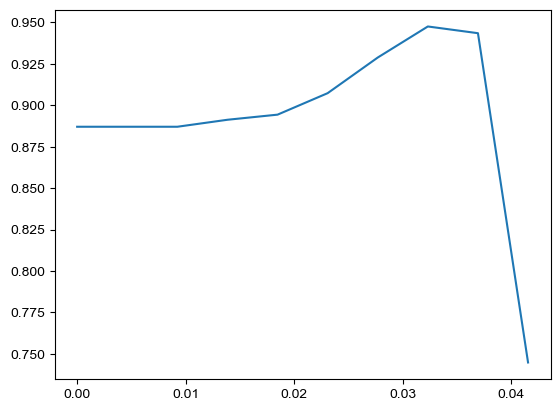

In [73]:
threshold = np.linspace(0,importance.max(),10)
score = []
time0 = time()

for i in threshold:
    X_embedded = SelectFromModel(RFC_clf,threshold=i).fit_transform(Xtrain,ytrain)
    val = cross_val_score(RFC_clf,X_embedded,ytrain,cv=5).mean()
    score.append(val)
    
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
plt.plot(threshold,score)
plt.show()

In [74]:
np.max(score) #highest

0.9475568439364566

In [75]:
threshold[np.argmax(score)] #suitable threshold

0.032320399073961156

In [76]:
X_embedded = SelectFromModel(RFC_clf,threshold = threshold[np.argmax(score)]).fit_transform(Xtrain,ytrain)

In [78]:
feature_chosen = list(Xtrain.columns[RFC_clf.feature_importances_ > threshold[np.argmax(score)]])

check the feature

In [79]:
feature_chosen

['cityuvs', 'cityorders', 'lastpvgap', 'cr', 'sid', 'visitnum_oneyear', 'h']

In [81]:
Xtrain_selected = pd.DataFrame(X_embedded,columns = feature_chosen )
Xtrain_selected.head()

,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0.207,0.020,88.0,1.04000,288.0,2997.0,8.0
1,35.567,6.120,198.0,1.13743,401.0,13944.0,12.0
2,1.900,0.487,12364.0,1.75000,1792.0,590.0,23.0
3,0.287,0.060,101833.0,1.00000,32.0,63.0,21.0
4,5.480,0.560,114.0,1.00000,372.0,7207.0,7.0


In [85]:
Xtest_selected = Xtest.loc[:,feature_chosen].reset_index(drop=True)
Xtest_selected.head()

,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0.393,0.087000,72926.0,1.330000,15,126.0,17
1,4.113,0.267000,1681.0,1.000000,61,2050.0,20
2,36.467,6.960000,179.0,1.000000,29,666.0,9
3,0.033,2.259314,2196.0,1.200000,309,3049.0,17
4,0.353,0.107000,2862.0,1.137582,47,1307.0,21


save the data

<AxesSubplot:>

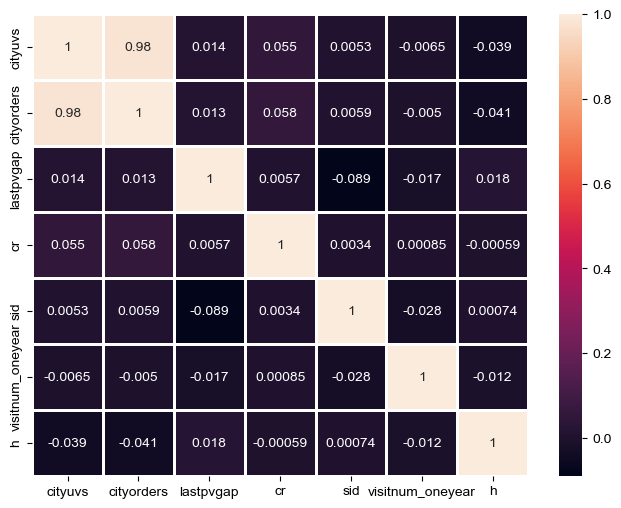

In [84]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(Xtrain_selected.corr(),annot=True,linewidths=1)

cityorders and cityuvs are correlated

In [86]:
Xtrain_selected.drop(columns='cityuvs',axis=1,inplace=True)
Xtest_selected.drop(columns='cityuvs',axis=1,inplace=True)

In [88]:
Xtrain_selected.to_csv('Xtrain_new.csv')
Xtest_selected.to_csv('Xtest_new.csv')
ytrain.to_csv('Ytrain.csv')
ytest.to_csv('Ytest.csv')